In [ ]:
#필수 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
# from pmdarima import auto_arima                     
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from xgboost import plot_importance

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving 2020_DATA _h6.csv to 2020_DATA _h6.csv


In [ ]:
data = pd.read_csv('2020_DATA _h6.csv')
data.head()

,SQ1,SQ2,SQ3,SQ4,A2_1,A2_2,A2_3,A2_4,A2_5,B1_1,...,E2_8,E3,F1,F2,F3,F4,F5,F6,F7,out
0,5,11,9,6,4,4,5,5,3,2,...,3,4,2,2,2,5,1,1,1,0
1,2,9,3,1,4,2,3,2,5,2,...,1,1,2,4,2,4,1,1,2,0
2,1,1,4,4,3,2,4,5,5,2,...,2,4,2,2,2,5,1,1,1,0
3,2,2,5,3,2,2,1,2,5,2,...,3,5,1,3,2,1,1,5,1,0
4,3,9,5,4,5,5,5,5,5,2,...,1,1,1,3,2,2,1,3,2,0


In [ ]:
print(data.isnull().any())

In [ ]:
#0=删除列 1=删除行
data = data.dropna(axis = 0)

4.0    95
5.0    89
3.0    80
6.0    54
2.0    31
1.0    24
Name: B4_3, dtype: int64

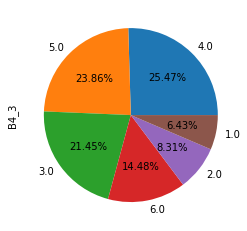

In [ ]:
data['B4_3'].value_counts().plot.pie(autopct = '%.2f%%');
data['B4_3'].value_counts()

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

1    199
0    174
Name: out, dtype: int64

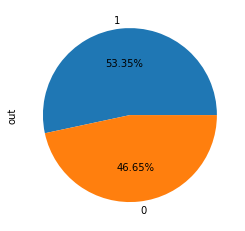

In [ ]:
data['out'].value_counts().plot.pie(autopct = '%.2f%%');
data['out'].value_counts()

In [ ]:
#x=截止到倒数第二行，y=最后一行
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [ ]:
##使用XGBoost

In [ ]:
#使用XGBoost进行训练
model = XGBClassifier()
model.fit(x,y)
# model.fit(x_train,y_train)

XGBClassifier()

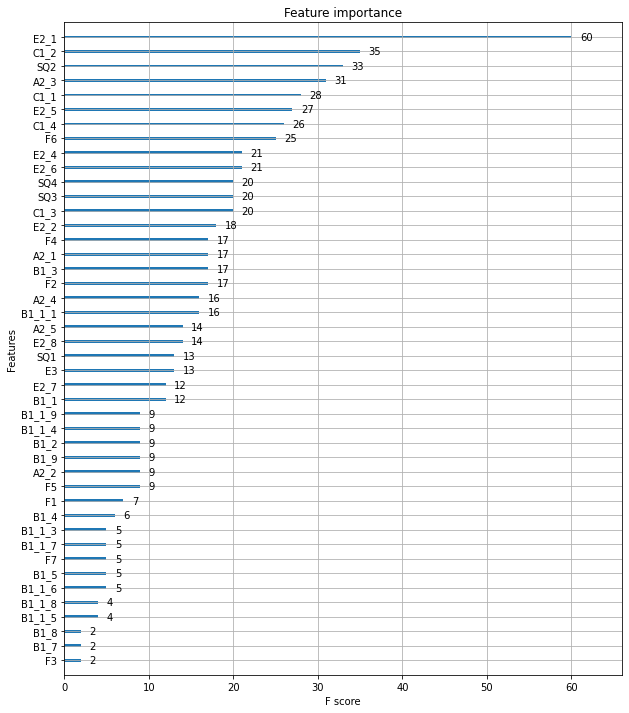

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(x, y)
Fscore = model_xgb.get_booster().get_fscore()
Xfig, a = plt.subplots(figsize = (10, 12))
plot_importance(Fscore, ax = a);

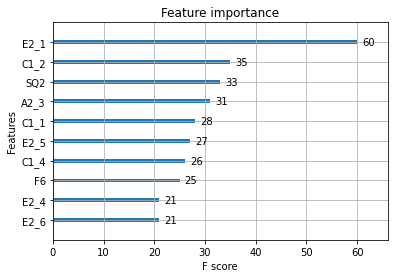

In [ ]:
# 绘制重要性曲线,max_num_feature参数设置输出前20重要的特征（）
plot_importance(model,max_num_features=10)
plt.show()

In [ ]:
#数据拆分
#测试准确率，0.2+2000=0.733
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2000)

In [ ]:
#使用XGBoost进行训练
model_XGB = XGBClassifier()
#model.fit(x,y)
model_XGB.fit(x_train,y_train)

XGBClassifier()

In [ ]:
#분류성능평가지표 함수만들기
def get_eval(y_test, y_pred = None, y_pred_proba = None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('accuracy: {0:.3f}, precision: {1:.3f}, recall: {2:.3f}, f1: {3:.3f}' .format(accuracy, precision, recall, f1))

#xgb
y_pred = model_XGB.predict(x_test)
y_pred_proba = model_XGB.predict_proba(x_test)[:,1]

get_eval(y_test, y_pred, y_pred_proba)

accuracy: 0.731, precision: 0.734, recall: 0.868, f1: 0.795


In [ ]:
x1 = data.loc[:, ['SQ5', 'B4_3', 'A2_3', 'SQ2', 'D2_3', 'E2_6', 'SQ4', 'F6', 'E2_8',  'C1_4']]
y = data.iloc[:, -1]

In [ ]:
x1

In [ ]:
#数据拆分
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 2000)

In [ ]:
#使用XGBoost进行训练
model_XGB = XGBClassifier()
#model.fit(x,y)
model_XGB.fit(x_train,y_train)

XGBClassifier()

In [ ]:
#분류성능평가지표 함수만들기
def get_eval(y_test, y_pred = None, y_pred_proba = None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('accuracy: {0:.3f}, precision: {1:.3f}, recall: {2:.3f}, f1: {3:.3f}' .format(accuracy, precision, recall, f1))

#xgb
y_pred = model_XGB.predict(x_test)
y_pred_proba = model_XGB.predict_proba(x_test)[:,1]

get_eval(y_test, y_pred, y_pred_proba)

accuracy: 0.653, precision: 0.641, recall: 0.676, f1: 0.658


In [ ]:
#LR
model_LR = LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#분류성능평가지표 함수만들기
def get_eval(y_test, y_pred = None, y_pred_proba = None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('accuracy: {0:.3f}, precision: {1:.3f}, recall: {2:.3f}, f1: {3:.3f}' .format(accuracy, precision, recall, f1))

#LR
y_pred = model_LR.predict(x_test)
y_pred_proba = model_LR.predict_proba(x_test)[:,1]

get_eval(y_test, y_pred, y_pred_proba)

accuracy: 0.693, precision: 0.675, recall: 0.730, f1: 0.701


In [ ]:
#RF
model_RF= RandomForestClassifier()
model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
def get_eval(y_test, y_pred = None, y_pred_proba = None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('accuracy: {0:.3f}, precision: {1:.3f}, recall: {2:.3f}, f1: {3:.3f}' .format(accuracy, precision, recall, f1))

#LR
y_pred = model_RF.predict(x_test)
y_pred_proba = model_RF.predict_proba(x_test)[:,1]

get_eval(y_test, y_pred, y_pred_proba)

accuracy: 0.693, precision: 0.684, recall: 0.703, f1: 0.693


In [ ]:
#KNC
model_KNC=KNeighborsClassifier()
model_KNC.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
def get_eval(y_test, y_pred = None, y_pred_proba = None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('accuracy: {0:.3f}, precision: {1:.3f}, recall: {2:.3f}, f1: {3:.3f}' .format(accuracy, precision, recall, f1))

#LR
y_pred = model_KNC.predict(x_test)
y_pred_proba = model_KNC.predict_proba(x_test)[:,1]

get_eval(y_test, y_pred, y_pred_proba)

accuracy: 0.520, precision: 0.511, recall: 0.622, f1: 0.561


# cnn卷积神经网络


In [ ]:
# # 参考代码： https://www.kaggle.com/code/vaishvik25/nn-conv1d/notebook
# 내 코드 그대로 하면 안돼
# 그 안에 데이터 전부 수정해야 해. 너 데이터 형태에 맞게

In [ ]:
import keras

num_preds = 5
num_features = x_train.shape[1]
learning_rate_init = 0.05

def get_model():
    inp = keras.layers.Input((num_features,))
    x = keras.layers.Reshape((num_features,1))(inp)
    x = keras.layers.Conv1D(16, 1,num_preds, activation='elu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv1D(32,1, activation='elu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv1D(16,1, activation='elu')(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.BatchNormalization()(x)
    out = keras.layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(inputs=inp, outputs=out)

In [ ]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [ ]:
model_CNN = get_model()
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1score])

In [ ]:
#epochs=训练时，所有训练数据集都训练过一次。
#
model_CNN.fit(x_train, y_train, epochs = 2000, batch_size = 256, verbose = 1)
# 源代码 model_CNN.fit(x_train, y_train, epochs = 150, batch_size = 10, verbose = 1)

In [ ]:
_loss, _acc, _precision, _recall, _f1score = model_CNN.evaluate(x_test, y_test, batch_size = 50, verbose=1)

2/2 [==============================] - 0s 9ms/step - loss: 0.6881 - accuracy: 0.5733 - precision: 0.5889 - recall: 0.5235 - f1score: 0.5543


#베타값 계산


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

LR = LogisticRegression()
LR.fit(x, y)

x2 = sm.add_constant(x)
model0 = sm.OLS(y, x2)
result = model0.fit()
print(result.summary())

In [ ]:
#使用 Scikit-learn提供的感知机方法来对上面的数据集进行分类效果测试
#参考 https://m-zhoujie2.gitbooks.io/python-introductory-and-advanced-data-analysis/content/chapter5.html

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [ ]:

# 对数据集进行切分，70% 为训练集，30% 为测试集。
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

# 构建模型
model = Perceptron()

# 训练模型
model.fit(x_train, y_train)

# 预测
results = model.predict(x_test)

# # 以默认样式绘制训练数据
# plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.3)

# # 以方块样式绘制测试数据
# plt.scatter(x_test[:, 0], x_test[:, 1], marker=',', c=y_test)

# # 将预测结果用标签样式标注在测试数据左上方
# for i, txt in enumerate(results):
#     plt.annotate(txt, (x_test:, 0, x_test:, 1))

# plt.show()

In [ ]:
print(model.score(x_test, y_test))

0.5625


In [ ]:
# 支持向量机
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# 导入支持向量机
from sklearn.svm import SVC


In [ ]:
# # 导入数据
# data = pd.read_csv("two_class_data.csv", header=0)

# # 定义特征变量和目标变量
# feature = data[['x', 'y']].values
# target = data['class'].values

# 对数据集进行切分，70% 为训练集，30% 为测试集。
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

# 构建模型
model = SVC()

# 训练模型
model.fit(x_train, y_train)

# 预测
results = model.predict(x_test)

# # 以默认样式绘制训练数据
# plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.3)

# # 以方块样式绘制测试数据
# plt.scatter(x_test[:, 0], x_test[:, 1], marker=',', c=y_test)

# # 将预测结果用标签样式标注在测试数据左上方
# for i, txt in enumerate(results):
#     plt.annotate(txt, (x_test:, 0, x_test:, 1))

# plt.show()

In [ ]:
print(model.score(x_test, y_test))

0.6339285714285714


In [ ]:
# K-近邻法（KNN）
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 对数据集进行切分，70% 为训练集，30% 为测试集。
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

# 构建模型
model = KNeighborsClassifier()

# 训练模型
model.fit(x_train, y_train)

# 预测
results = model.predict(x_test)

print(model.score(x_test, y_test))

# # 绘制决策边界等高线图
# cm0 = plt.cm.Oranges
# cm1 = plt.cm.Greens
# cm2 = plt.cm.Reds
# cm_color = ListedColormap(['red', 'yellow'])

# x_min, x_max = data['x'].min() - .5, data['x'].max() + .5
# y_min, y_max = data['y'].min() - .5, data['y'].max() + .5

# xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
#                      np.arange(y_min, y_max, .1))

# Z0 = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
# Z1 = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Z2 = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 2]

# Z0 = Z0.reshape(xx.shape)
# Z1 = Z1.reshape(xx.shape)
# Z2 = Z2.reshape(xx.shape)

# plt.contourf(xx, yy, Z0, cmap=cm0, alpha=.9)
# plt.contourf(xx, yy, Z1, cmap=cm1, alpha=.5)
# plt.contourf(xx, yy, Z2, cmap=cm2, alpha=.4)

# # 绘制训练集和测试集
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_color)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_color, edgecolors='black')
# plt.show()

0.5982142857142857


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:

# 建立模型
model_tree = DecisionTreeClassifier(random_state=10)
model_random = RandomForestClassifier(random_state=10)

# 训练模型并验证
model_tree.fit(x_train, y_train)
s1 = model_tree.score(x_test, y_test)

model_random.fit(x_train, y_train)
s2 = model_random.score(x_test, y_test)

print('DecisionTree:', s1)
print('RandomForest:', s2)

DecisionTree: 0.5089285714285714
RandomForest: 0.6339285714285714
